In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys, os
import math
from adjustText import adjust_text

In [2]:
df=pd.read_csv('FinalOutTopics.csv')
print (len(df.index))
#methods=pd.read_csv('MethodValues.csv')
#df = df.astype({"Topic": str}, errors='raise')
#df = pd.merge(df, methods, on='id',how='left').fillna(0)
df['Cluster'] = " "
df.shape
df = df.drop_duplicates(subset=["id"], keep='first')
print (len(df.index))

1138
1137


In [3]:
non_numeric = ['id','Govern_Top','Hazard','Material','Type','Locationwise','Usage','Cluster','Keywords','Approach',]

df_numeric = df.drop(non_numeric, axis = 1)
col = ['Earthquake','Flood','Tsunami','Hurricane','RC','Wood','Steel','Masonry','Lowrise','Medrise','Regional','Urban','Residential'] 
for i in col:
    df_numeric[i] = df[i].fillna(0)
    
df_numeric

,Earthquake,Flood,Tsunami,Hurricane,RC,Wood,Steel,Masonry,Lowrise,Medrise,Regional,Urban,Residential
0,0.7331,0.0000,0.0000,0.000000,0.051317,0.0000,0.0000,0.073784,0.0,0.000000,0.0474,0.0000,0.0000
1,0.0749,0.8425,0.0000,0.000000,0.005243,0.0000,0.0000,0.007885,0.0,0.000000,0.0395,0.0000,0.0142
2,0.6605,0.0000,0.0000,0.000000,0.046235,0.0000,0.0000,0.066881,0.0,0.000000,0.0831,0.2085,0.0000
3,0.1495,0.3936,0.0000,0.000000,0.010465,0.0000,0.0000,0.015060,0.0,0.000000,0.0110,0.2341,0.1719
4,0.7865,0.0817,0.0000,0.055400,0.055055,0.0000,0.0157,0.078650,0.0,0.000000,0.0000,0.0318,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1133,0.7514,0.0000,0.0000,0.059500,0.052598,0.0000,0.0000,0.076037,0.0,0.000000,0.0897,0.0000,0.0215
1134,0.6884,0.0220,0.0000,0.013363,0.064088,0.0161,0.0000,0.069846,0.0,0.002067,0.1006,0.0947,0.0000
1135,0.6666,0.0000,0.0000,0.000000,0.153762,0.0000,0.0638,0.066972,0.0,0.013923,0.0312,0.0000,0.0000
1136,0.8803,0.0000,0.0000,0.000000,0.061621,0.0000,0.0000,0.088976,0.0,0.000000,0.0946,0.0000,0.0000


In [4]:
from sklearn.manifold import TSNE

m = TSNE(n_components=2, random_state = 0, learning_rate = 50)

In [5]:
tsne_features = m.fit_transform(df_numeric)
tsne_features

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


array([[-28.558348  ,  -9.002359  ],
       [ 65.88991   ,  -0.42125726],
       [ -4.4251037 ,  -5.586963  ],
       ...,
       [-19.708168  ,  17.645191  ],
       [-37.653725  ,   6.107267  ],
       [ 27.031664  ,  23.629292  ]], dtype=float32)

In [6]:
df['x'] = tsne_features[:,0]
df['y'] = tsne_features[:,1]

<function matplotlib.pyplot.show(close=None, block=None)>

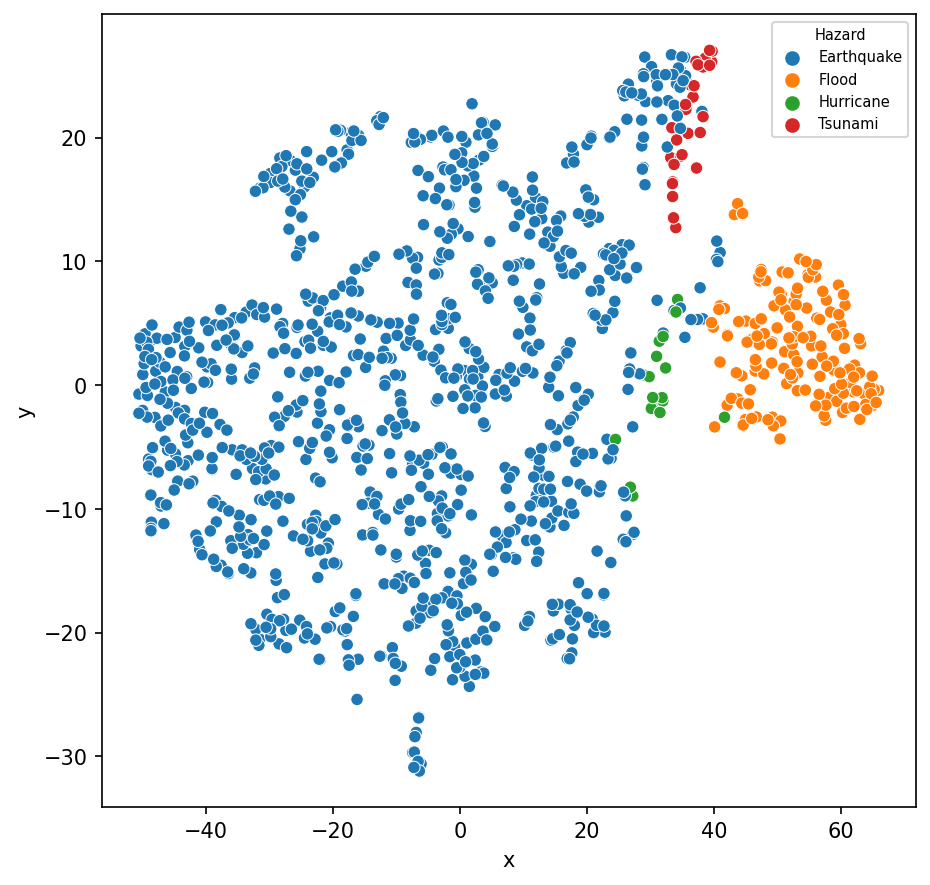

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots( figsize=(7,7), dpi=150)
plt.rc('font',size=7)
plt.rc('axes',titlesize=7)
plt.rc('axes',labelsize=7)
plt.rc('xtick',labelsize=7)
plt.rc('ytick',labelsize=7)
plt.rc('legend',fontsize=7)
plt.rc('figure',titlesize=7)

sns.scatterplot(x = 'x' , y = 'y', hue= 'Hazard', data =df)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

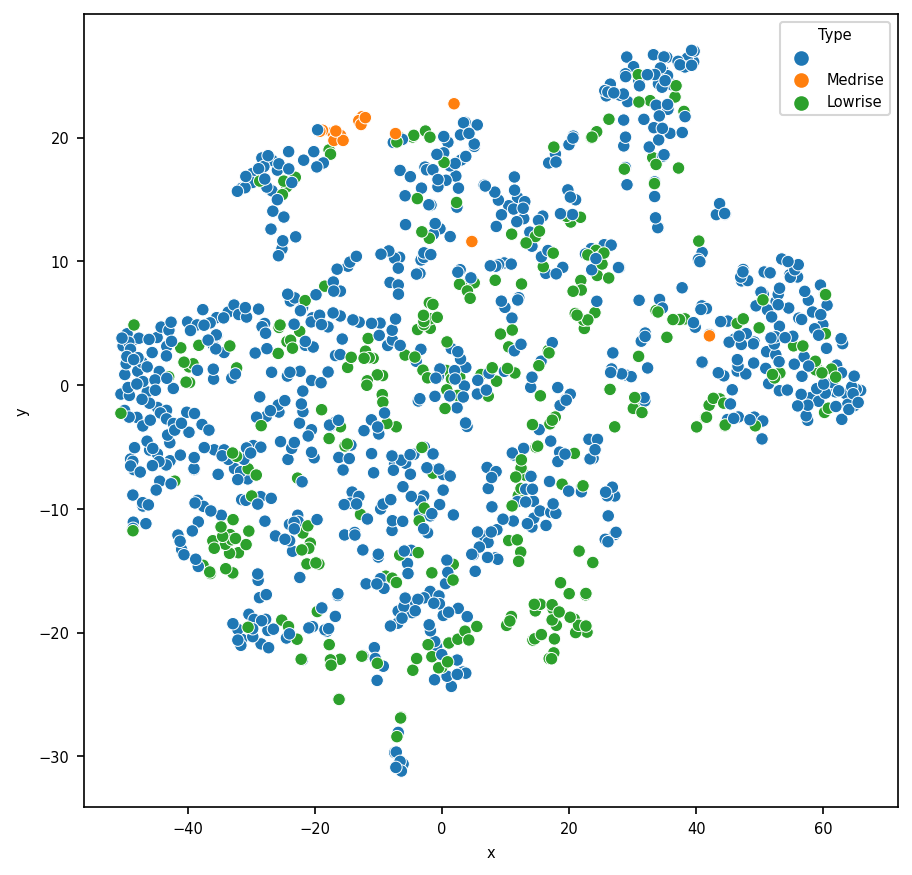

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots( figsize=(7,7), dpi=150)
sns.scatterplot(x = 'x' , y = 'y', hue= 'Type', data =df)

plt.show

In [9]:
from sklearn.cluster import DBSCAN

min_samples = 32
clustered = DBSCAN(eps=5.5, min_samples = min_samples).fit(tsne_features)
clust_arr = clustered.labels_


for i in range (len(df.index)):
    df['Cluster'][i] = str(clust_arr[i])
    

C:\Users\User\AppData\Local\Temp\ipykernel_1852\2851447166.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'][i] = str(clust_arr[i])
C:\Users\User\AppData\Local\Temp\ipykernel_1852\2851447166.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'][i] = str(clust_arr[i])


<function matplotlib.pyplot.show(close=None, block=None)>

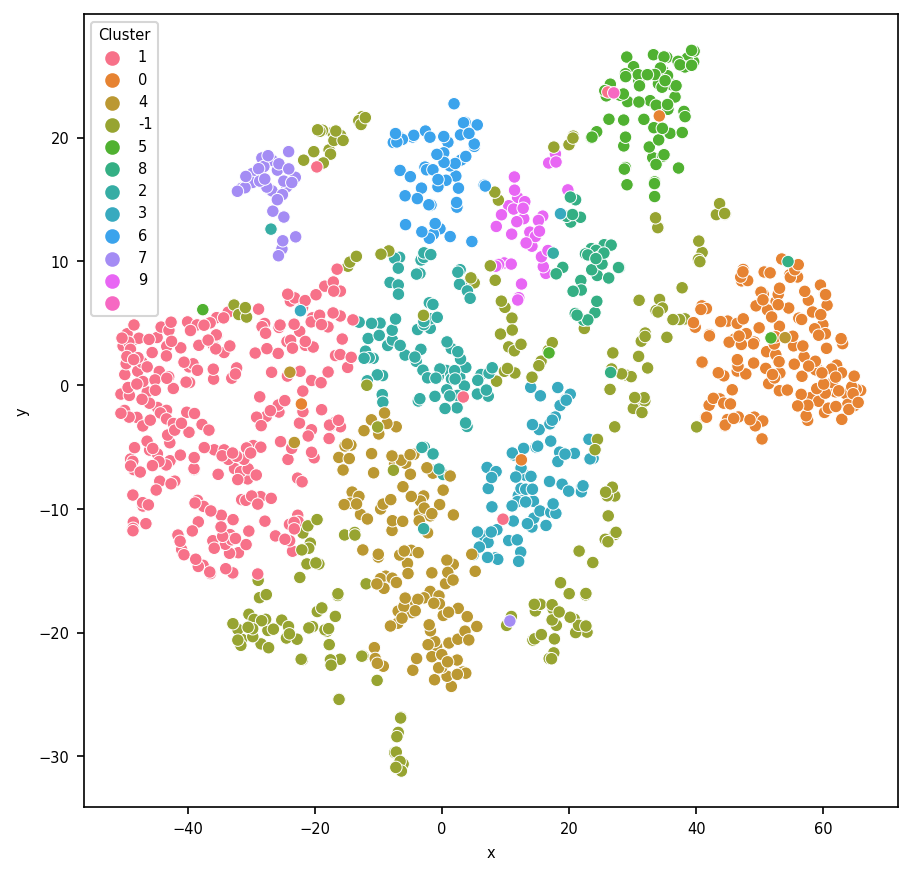

In [10]:
df['x'] = tsne_features[:,0]
df['y'] = tsne_features[:,1]

import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots( figsize=(7,7), dpi=150)
sns.scatterplot(x = 'x' , y = 'y', hue= 'Cluster', data =df)

plt.show


In [30]:
df['Ann'] = " "

Earth_Ann = ["seismic", "earthquake", "ground_motion", "nonlinear"]

for k in Earth_Ann:
        temp2 = df[df['Hazard'] == 'Earthquake']
        temp3 = temp2[temp2['Ann'] == " " ].sample()
        df['Ann'][temp3.index] = k

df1 = df[df['Hazard'] == 'Earthquake']

ListClusters = df1.Cluster.unique().tolist()

ListClusters.remove("-1")

for i in ListClusters:
    keybag = []
    for j in df1.index:
        if df1['Cluster'][j] == i:
            try:
                tempkey = [ x.strip() for x in df1['Keywords'][j].strip('[]').split(',') ]
            except AttributeError:
                continue
            else:
                for k in range (0,len(tempkey)-1):
                    keybag.append(tempkey[k])
    
    unique_words = list(set(keybag))
    for k in unique_words:
        if keybag.count(k)>= min_samples*0.78 and k not in Earth_Ann:
            temp2 = df1[df1['Cluster'] == i]
            temp3 = temp2[temp2['Ann'] == " " ]
            temp1 = temp3.loc[temp3['Keywords'].str.contains(k, case=False, na=False)].sample()
            df['Ann'][temp1.index] = k

df2 = df[df['Hazard'] == 'Flood']

ListClusters = df2.Cluster.unique().tolist()

ListClusters.remove("-1")

for i in ListClusters:
    keybag = []
    for j in df2.index:
        if df2['Cluster'][j] == i:
            try:
                tempkey = [ x.strip() for x in df2['Keywords'][j].strip('[]').split(',') ]
            except AttributeError:
                continue
            else:
                for k in range (0,len(tempkey)-1):
                    keybag.append(tempkey[k])
    
    unique_words = list(set(keybag))
    for k in unique_words:
        if keybag.count(k)>= min_samples*0.6 and k not in Earth_Ann:
            temp2 = df2[df2['Cluster'] == i]
            temp3 = temp2[temp2['Ann'] == " " ]
            temp1 = temp3.loc[temp3['Keywords'].str.contains(k, case=False, na=False)].sample()
            df['Ann'][temp1.index] = k

df3 = df[df['Hazard'] == 'Tsunami']

ListClusters = df3.Cluster.unique().tolist()

ListClusters.remove("-1")

for i in ListClusters:
    keybag = []
    for j in df3.index:
        if df3['Cluster'][j] == i:
            try:
                tempkey = [ x.strip() for x in df3['Keywords'][j].strip('[]').split(',') ]
            except AttributeError:
                continue
            else:
                for k in range (0,len(tempkey)-1):
                    keybag.append(tempkey[k])
    
    unique_words = list(set(keybag))
    for k in unique_words:
        if keybag.count(k)>= min_samples*0.5 and k not in Earth_Ann:
            temp2 = df3[df3['Cluster'] == i]
            temp3 = temp2[temp2['Ann'] == " " ]
            temp1 = temp3.loc[temp3['Keywords'].str.contains(k, case=False, na=False)].sample()
            df['Ann'][temp1.index] = k
            
Hur_Ann = ["prediction", "hurricane", "wind", "storm"]
Steel_Ann = ["steel", "frame"]

for k in Hur_Ann:
        temp2 = df[df['Hazard'] == 'Hurricane']
        temp3 = temp2[temp2['Ann'] == " " ].sample()
        df['Ann'][temp3.index] = k

for k in Steel_Ann:
        temp2 = df[df['Material'] == 'Steel']
        temp3 = temp2[temp2['Ann'] == " " ].sample()
        df['Ann'][temp3.index] = k

C:\Users\User\AppData\Local\Temp\ipykernel_1852\3874443277.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Ann'][temp3.index] = k
C:\Users\User\AppData\Local\Temp\ipykernel_1852\3874443277.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Ann'][temp3.index] = k
C:\Users\User\AppData\Local\Temp\ipykernel_1852\3874443277.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Ann'][temp3.index] = k
C:\Users\User\AppData\Loc

In [ ]:
df.to_csv('Temp.csv', index=False)

<function matplotlib.pyplot.show(close=None, block=None)>

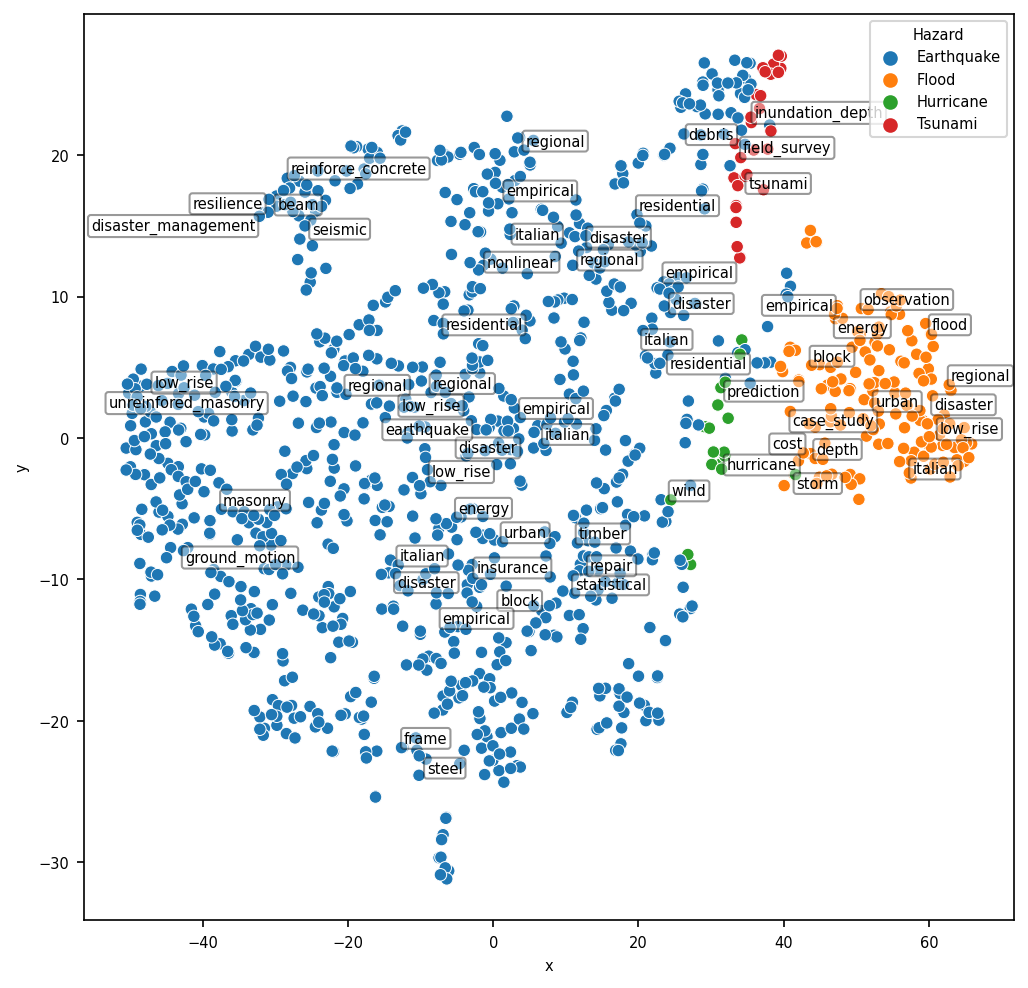

In [31]:
df['x'] = tsne_features[:,0]
df['y'] = tsne_features[:,1]

import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots( figsize=(8,8), dpi=150)
sns.scatterplot(x = 'x' , y = 'y', hue= 'Hazard', data =df)

texts = []
for p in df.index:
    if df['Ann'][p] != " ":
    
        texts.append(ax.annotate(df['Ann'][p], xy = (df['x'][p],df['y'][p]), xytext= (df['x'][p],df['y'][p]), fontsize = 7, ha="center",va="center", bbox={'facecolor':"white", 'alpha':0.4, 'pad':0.2, 'boxstyle': 'round'} ))

adjust_text(texts)

plt.show


In [32]:
fig.savefig(f'clusters.png')